In [1]:
import pandas as pd

raw_data = pd.read_csv("mammographic_masses.data.txt",names=['BI-RADS','Age','Shape','Margin','Density','Severity'],dtype='Int64',na_values='?')
raw_data.describe(include='all')

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.0,956.0,930.0,913.0,885.0,961.0
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.0,18.0,1.0,1.0,1.0,0.0
25%,4.0,45.0,2.0,1.0,3.0,0.0
50%,4.0,57.0,3.0,3.0,3.0,0.0
75%,5.0,66.0,4.0,4.0,3.0,1.0
max,55.0,96.0,4.0,5.0,4.0,1.0


In [2]:
raw_data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,<NA>,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,<NA>,1


In [35]:
raw_data.loc[(raw_data['Age'].isnull()) |
              (raw_data['Shape'].isnull()) |
              (raw_data['Margin'].isnull()) |
              (raw_data['Density'].isnull())]

,BI-RADS,Age,Shape,Margin,Density,Severity
1,4,43,1,1,<NA>,1
4,5,74,1,5,<NA>,1
5,4,65,1,<NA>,3,0
6,4,70,<NA>,<NA>,3,0
7,5,42,1,<NA>,3,0
...,...,...,...,...,...,...
778,4,60,<NA>,4,3,0
819,4,35,3,<NA>,2,0
824,6,40,<NA>,3,4,1
884,5,<NA>,4,4,3,1


In [3]:
raw_data_na=raw_data.dropna()
# raw_data.dropna(inplace=True)
# raw_data.head()
raw_data_na.describe(include='all')

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.0,830.0,830.0,830.0,830.0,830.0
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.0,18.0,1.0,1.0,1.0,0.0
25%,4.0,46.0,2.0,1.0,3.0,0.0
50%,4.0,57.0,3.0,3.0,3.0,0.0
75%,5.0,66.0,4.0,4.0,3.0,1.0
max,55.0,96.0,4.0,5.0,4.0,1.0


In [4]:
import numpy as np

features = raw_data_na[['Age','Shape','Margin','Density']].to_numpy(dtype='float32')
classes = raw_data_na['Severity'].to_numpy(dtype='float32')
names = list(raw_data_na)[1:5]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)
print(features)
print(features_scaled)

[[67.  3.  5.  3.]
 [58.  4.  5.  3.]
 [28.  1.  1.  3.]
 ...
 [64.  4.  5.  3.]
 [66.  4.  5.  3.]
 [62.  3.  3.  3.]]
[[ 0.76506287  0.17563638  1.3961849   0.24046606]
 [ 0.15127061  0.9810408   1.3961849   0.24046606]
 [-1.8947036  -1.4351724  -1.1577181   0.24046606]
 ...
 [ 0.56046546  0.9810408   1.3961849   0.24046606]
 [ 0.6968637   0.9810408   1.3961849   0.24046606]
 [ 0.4240672   0.17563638  0.11923341  0.24046606]]


**Decision Tree**

In [36]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
features_train, features_test, classes_train, classes_test = train_test_split(features_scaled, classes, test_size=0.25, random_state=24)
print(features_train.shape, classes_train.shape)
print(features_test.shape, classes_test.shape)

(622, 4) (622,)
(208, 4) (208,)


In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(features_train,classes_train)
clf.score(features_test, classes_test)

0.7451923076923077

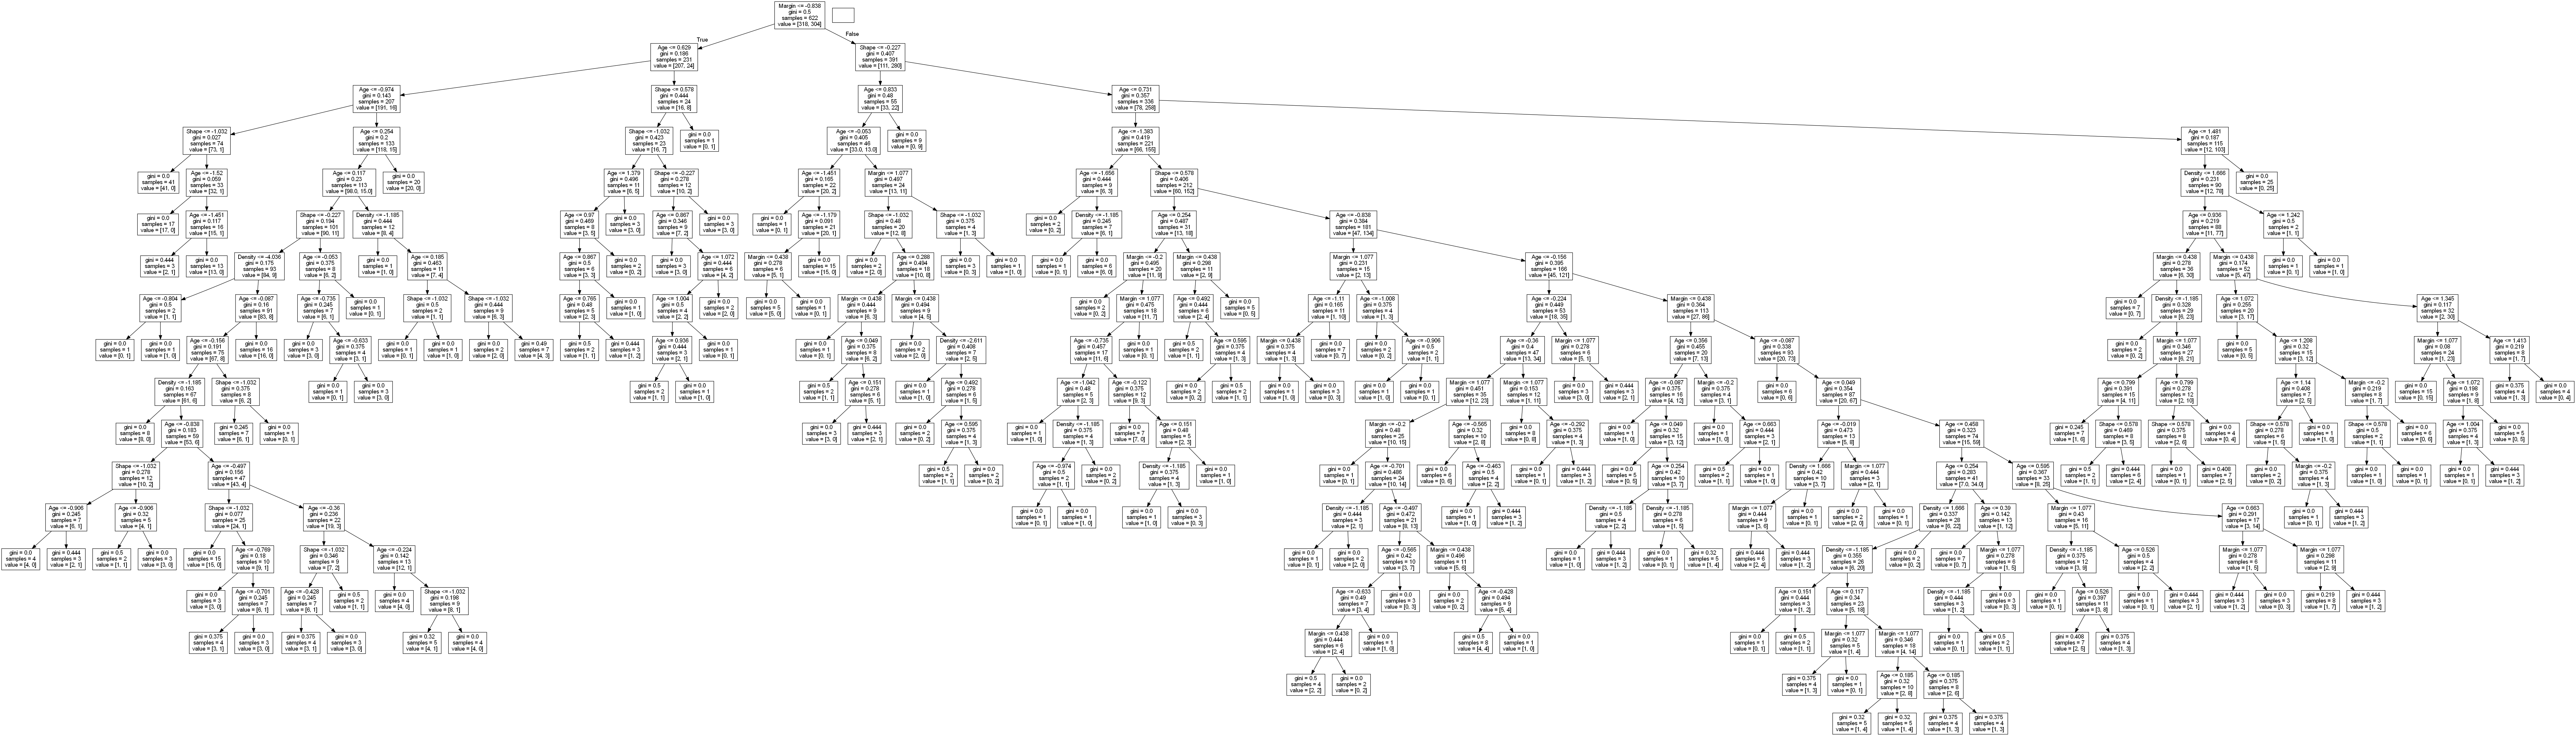

In [8]:
from IPython.display import Image  
from io import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,feature_names=names)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, features_train, classes_train, cv=10)
print(scores)
print(scores.mean())

[0.68253968 0.73015873 0.75806452 0.70967742 0.69354839 0.79032258
 0.69354839 0.77419355 0.75806452 0.79032258]
0.7380440348182283


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=100,random_state=45).fit(features_train,classes_train)
# scores_RF = cross_val_score(clf_RF, features_train, classes_train, cv=10)
# print(scores_RF)
# print(scores_RF.mean())
clf_RF.score(features_test,classes_test)

0.7788461538461539

**SVM Support Vector Machine**

In [11]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(features_train, classes_train)
# scores_svc = cross_val_score(svc, features_train, classes_train, cv=10)
# print(scores_svc.mean())
svc.score(features_test,classes_test)

0.7836538461538461

**KNN K Nearest Neighbours**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []
n_neighbours = range(1,50)
for n in n_neighbours:
    knc = KNeighborsClassifier(n_neighbors=n).fit(features_train,classes_train)
    scores_knc = cross_val_score(knc, features_train, classes_train, cv=10)
    cv_scores.append(scores_knc.mean())

print(max(cv_scores))
n = n_neighbours[np.argmax(scores)]
print("Max at {} neighbours".format(n))
knc = KNeighborsClassifier(n_neighbors=n).fit(features_train,classes_train)
knc.score(features_test,classes_test)


0.8053251408090117
Max at 6 neighbours


0.7884615384615384

**Naive Bayes**

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(features_train)
features_train_sc = scaler.transform(features_train)
features_test_sc = scaler.transform(features_test)
print(features_train)
print(features_train_sc)

nbc = MultinomialNB().fit(features_train_sc, classes_train)
nbc.score(features_test_sc, classes_test)

[[-0.12152594 -0.629768    0.7577091   0.24046606]
 [ 0.08307149 -1.4351724  -1.1577181   0.24046606]
 [-2.031102   -1.4351724  -1.1577181   0.24046606]
 ...
 [ 0.49226636  0.17563638  0.7577091   0.24046606]
 [ 1.3106561   0.9810408   0.7577091   0.24046606]
 [ 0.08307149 -1.4351724  -1.1577181   0.24046606]]
[[0.48       0.33333334 0.74999994 0.6666666 ]
 [0.52       0.         0.         0.6666666 ]
 [0.10666668 0.         0.         0.6666666 ]
 ...
 [0.59999996 0.6666667  0.74999994 0.6666666 ]
 [0.76       1.         0.74999994 0.6666666 ]
 [0.52       0.         0.         0.6666666 ]]


0.7740384615384616

**SVM Kernals**

In [14]:
kernels = ['linear','rbf','sigmoid','poly']
C = 1.0
cv_scores = []
for k in kernels:
    svc = svm.SVC(kernel=k, C=C).fit(features_train, classes_train)
    scores_svc = cross_val_score(svc, features_train, classes_train, cv=10)
    cv_scores.append(scores_svc.mean())

print(kernels)
print(cv_scores)
k = kernels[np.argmax(cv_scores)]
print("Max {} at {} kernel".format(max(cv_scores),k))
svc = svm.SVC(kernel=k, C=C).fit(features_train, classes_train)
svc.score(features_test,classes_test)

['linear', 'rbf', 'sigmoid', 'poly']
[0.8022017409114184, 0.8006144393241167, 0.7315412186379928, 0.7942396313364055]
Max 0.8022017409114184 at linear kernel


0.7836538461538461

**Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state=0).fit(features_train, classes_train)
lrc.score(features_test,classes_test)

0.7932692307692307

**Neural Network with Keras**

In [16]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop

n_features = features_train.shape[1]
model = Sequential()
model.add(Input((n_features,))) # Input tensor
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid')) #other optimisers : rmsprop, adam 
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(features_train, classes_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(features_test, classes_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5511 - loss: 0.6930 - val_accuracy: 0.7837 - val_loss: 0.6918
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 0.6916 - val_accuracy: 0.7837 - val_loss: 0.6889
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - loss: 0.6883 - val_accuracy: 0.7933 - val_loss: 0.6840
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.6822 - val_accuracy: 0.7981 - val_loss: 0.6764
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.6736 - val_accuracy: 0.7981 - val_loss: 0.6657
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.6603 - val_accuracy: 0.7981 - val_loss: 0.6517
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.6501 - val_accuracy: 0.7933 - val_loss: 0.6345
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.6270 - val_accuracy: 0.7933 - 

In [18]:
score = model.evaluate(features_test, classes_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 - 0s - 3ms/step - accuracy: 0.7933 - loss: 0.4726
Test loss: 0.4726087152957916
Test accuracy: 0.7932692170143127


**XGBoost?**

In [23]:
# import xgboost as xgb

# train_xg = xgb.DMatrix(features_train, label=classes_train)
# test_xg = xgb.DMatrix(features_test, label=classes_test)

# param = {
#     'max_depth': 4,
#     #'eta': 0.3,
#     'objective': 'binary:logistic',
#     'num_class': 2} 
# epochs = 10 

# model_xg = xgb.train(param, train_xg, epochs)
# predictions = model_xg.predict(test_xg)

# from sklearn.metrics import accuracy_score
# accuracy_score(test_xg, predictions)

In [25]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
xgb_classifier = XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
xgb_classifier.fit(features_train, classes_train)

class_pred = xgb_classifier.predict(features_test)
class_pred_proba = xgb_classifier.predict_proba(features_test)
accuracy = xgb_classifier.score(features_test, classes_test)
print(accuracy)

[0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0]
0.7596153846153846


In [29]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(classes_test, class_pred_proba)

0.5688604553036594

In [30]:
# Calculate ROC AUC
roc_auc_score(classes_test, class_pred_proba[:,1])

0.8358817533129461

In [31]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(classes_test, class_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       109
         1.0       0.75      0.75      0.75        99

    accuracy                           0.76       208
   macro avg       0.76      0.76      0.76       208
weighted avg       0.76      0.76      0.76       208

